In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


load_dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
path = "/content/drive/MyDrive/malaria/images"

Loading Training and Testing Files

In [ ]:
import json

# Opening JSON file
f = open('/content/drive/MyDrive/malaria/test.json')
data = json.load(f)
test_files_infected=[]
test_files_normal=[]

box=[]
for j in data:
  #print(i['image']['pathname'])
  list_iter=[]
  for i in j['objects']:
    temp=False
    list_iter.append(i['bounding_box'])
  box.append(list_iter)
print((box[0]))


[{'minimum': {'r': 576, 'c': 1744}, 'maximum': {'r': 708, 'c': 1883}}, {'minimum': {'r': 863, 'c': 1249}, 'maximum': {'r': 977, 'c': 1373}}, {'minimum': {'r': 210, 'c': 1573}, 'maximum': {'r': 335, 'c': 1711}}, {'minimum': {'r': 1017, 'c': 1124}, 'maximum': {'r': 1142, 'c': 1253}}, {'minimum': {'r': 572, 'c': 1655}, 'maximum': {'r': 695, 'c': 1763}}, {'minimum': {'r': 477, 'c': 1307}, 'maximum': {'r': 590, 'c': 1429}}, {'minimum': {'r': 962, 'c': 595}, 'maximum': {'r': 1089, 'c': 738}}, {'minimum': {'r': 417, 'c': 1699}, 'maximum': {'r': 551, 'c': 1838}}, {'minimum': {'r': 1162, 'c': 767}, 'maximum': {'r': 1284, 'c': 894}}, {'minimum': {'r': 1080, 'c': 654}, 'maximum': {'r': 1199, 'c': 774}}, {'minimum': {'r': 961, 'c': 1338}, 'maximum': {'r': 1089, 'c': 1479}}, {'minimum': {'r': 624, 'c': 910}, 'maximum': {'r': 746, 'c': 1034}}, {'minimum': {'r': 1122, 'c': 1319}, 'maximum': {'r': 1252, 'c': 1457}}, {'minimum': {'r': 890, 'c': 477}, 'maximum': {'r': 1004, 'c': 617}}, {'minimum': {'r':

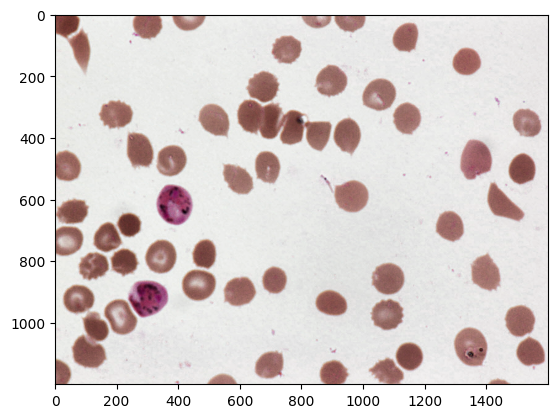

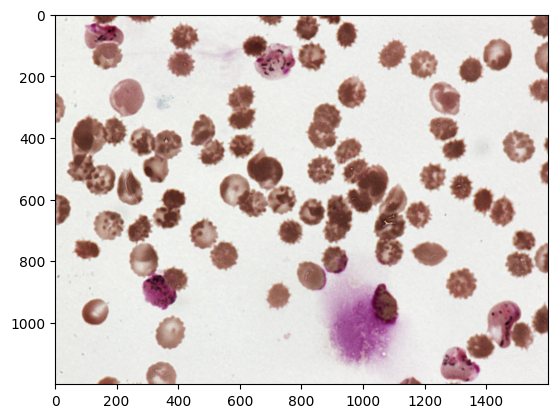

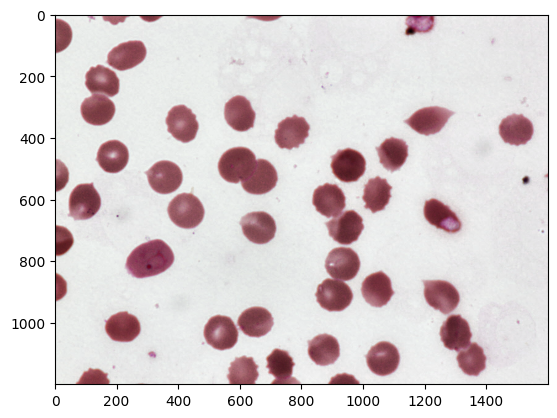

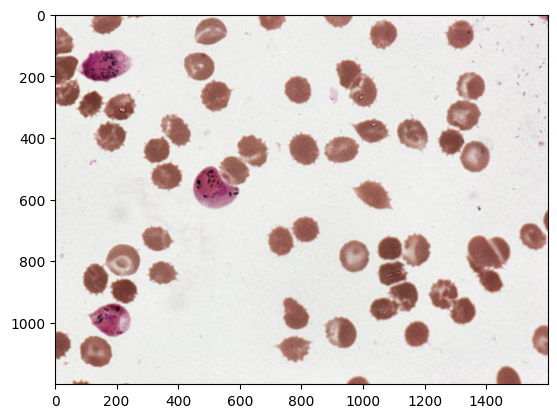

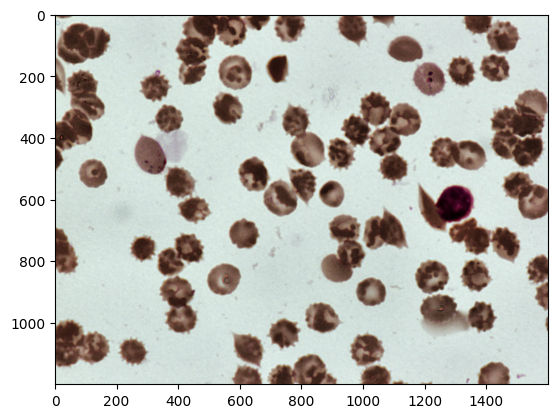

In [ ]:
i=0
all_images=[]
for img in os.listdir(path):
        if i==5:
          break
        img_array = cv2.imread(os.path.join(path,img))
        all_images.append(img_array)
        i=i+1
        plt.imshow(img_array)
        plt.show()

In [ ]:
#print(img_array[0])
print(len(all_images))

5


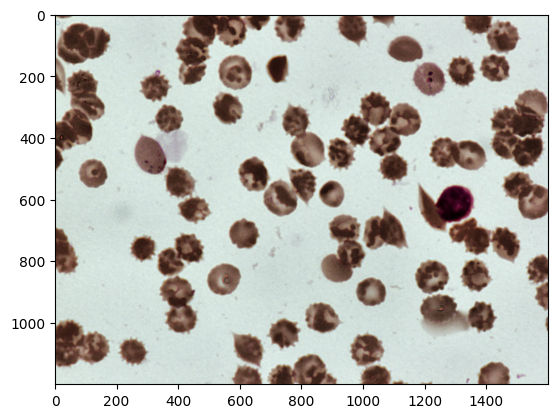

In [ ]:
plt.imshow(img_array)
plt.show()

extract_boxes

In [ ]:
import cv2
import numpy as np

# Load image, grayscale, Otsu's threshold
#image = cv2.imread(os.path.join(path,img))
original = img_array.copy()
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]




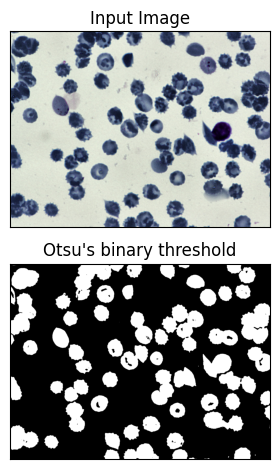

In [ ]:
from matplotlib import pyplot as plt
img = img_array
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

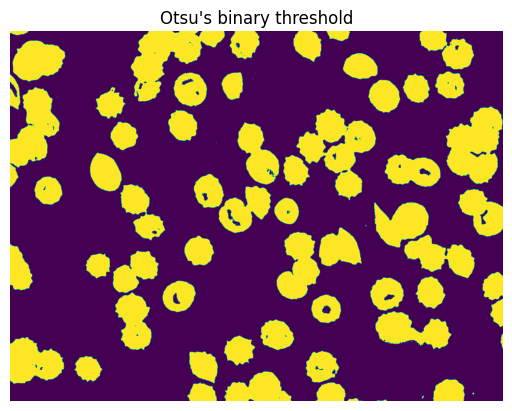

In [ ]:
plt.imshow(thresh)
plt.title("Otsu's binary threshold")
plt.axis('off')
plt.show()

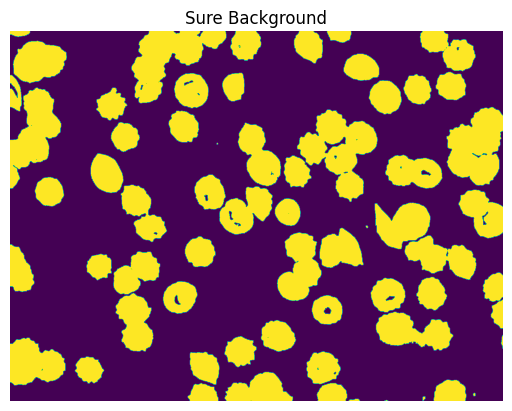

In [ ]:
plt.imshow(sure_bg)
plt.title("Sure Background")
plt.axis('off')
plt.show()

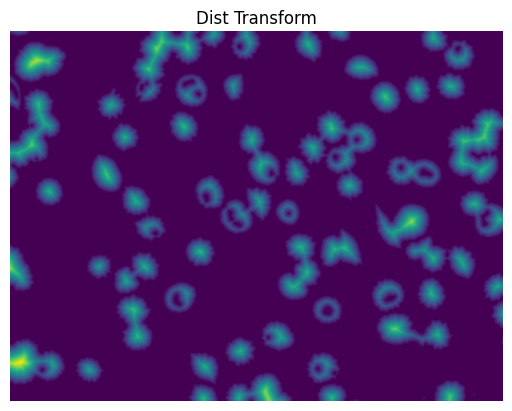

In [ ]:
plt.imshow(dist_transform)
plt.title("Dist Transform")
plt.axis('off')
plt.show()

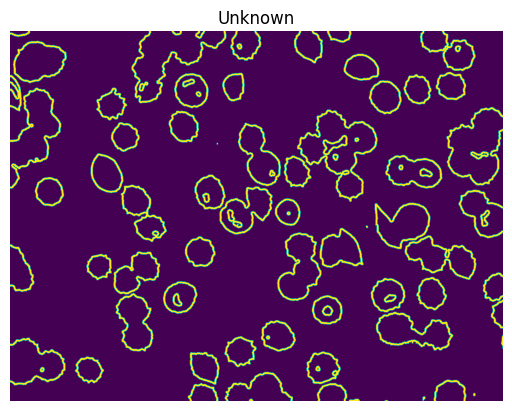

In [ ]:
plt.imshow(unknown)
plt.title("Unknown")
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(unknown)
plt.title("Unknown")
plt.axis('off')
plt.show()

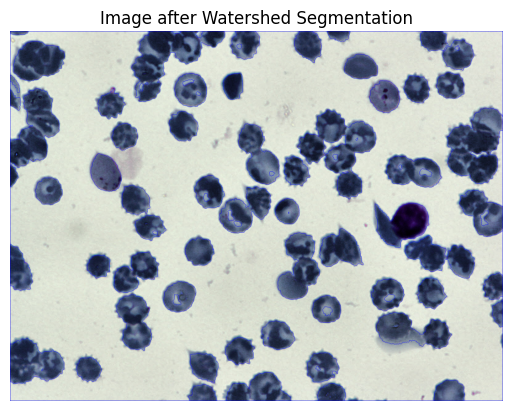

In [ ]:
# Convert back to RGB for displaying with matplotlib
b, g, r = cv2.split(img)
rgb_img_segmented = cv2.merge([r, g, b])

# Display the image after watershed segmentation
plt.imshow(rgb_img_segmented)
plt.title('Image after Watershed Segmentation')
plt.axis('off')
plt.show()

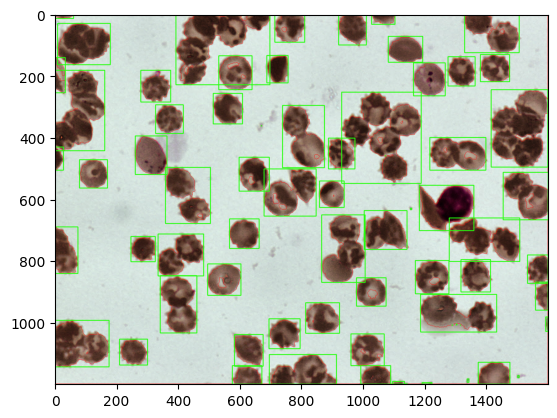

-1

In [ ]:
# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0

#cv.findContours(	image, mode, method[, contours[, hierarchy[, offset]]])

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    # cv2.rectangle(image, start_point, end_point, color, thickness)
    #w is max_x - min_x and h is max_y - min_y
    cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

plt.imshow(img)
plt.show()

cv2.waitKey()